In [12]:
############################
### IMPORT THE LIBRARIES ###
############################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import time
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [48]:
###############################
### DETERMINE SARIMAX MODEL ###
###############################
# Use auto_arima to select optimal parameters 
model = auto_arima(train_data['energy(kWh/hh)'], exogenous=train_data.iloc[:, 1:], seasonal=True, m=24, suppress_warnings=True, trace=True, stepwise=False, max_order=3, n_jobs=4)

# Best model:  ARIMA(0,1,1)(1,0,1)[24] intercept
# Total fit time: 439.737 seconds



Best model:  ARIMA(0,1,1)(1,0,1)[24] intercept
Total fit time: 417.000 seconds


In [46]:
###########################
### DATASETS START HERE ###
###########################

In [24]:
##############################################
##############################################
### DATASET # 01 : ELECTRICITY CONSUMPTION ###
##############################################
##############################################

################################
### PREPARE TRAINING DATASET ###
################################
# ### Import the Variables from Excel ###
trainset = pd.read_excel("Final_Train_One_Year.xlsx")
trainset['Date'] = pd.to_datetime(trainset['Date'], format="%Y-%m-%d %H:%M:%S")
trainset['Timestamp'] = trainset['Date'].values.astype(np.int64) // 10 ** 9
trainset.set_index('Timestamp', inplace=True)

### Create Dummy Variables for Columns with Categorical Data ###
trainset_update = pd.get_dummies(trainset, columns=['Month', 'Day of Week', 'Holiday'], drop_first=False)
trainset_update = trainset_update.drop('Date', axis=1)
trainset_update.fillna(0, inplace=True)

col = trainset_update.pop('energy(kWh/hh)')
trainset_update.insert(0, 'energy(kWh/hh)', col)
train_data = trainset_update

### Keep only energy
train_data = train_data[['energy(kWh/hh)']]

########################
### CREATE TEST DATA ###
########################
### Import the Variables from Excel ###
trainset = pd.read_excel("Final_Test_One_Year_Forecasting.xlsx")
trainset['Date'] = pd.to_datetime(trainset['Date'], format="%Y-%m-%d %H:%M:%S")
trainset['Timestamp'] = trainset['Date'].values.astype(np.int64) // 10 ** 9
trainset.set_index('Timestamp', inplace=True)

### Create Dummy Variables for Columns with Categorical Data ###
trainset_update = pd.get_dummies(trainset, columns=['Month', 'Day of Week', 'Holiday'], drop_first=False)
trainset_update = trainset_update.drop('Date', axis=1)
trainset_update.fillna(0, inplace=True)

# Not in Test Data: 'summary_Windy and Mostly Cloudy', 'precipType_snow'
trainset_update['summary_Windy and Mostly Cloudy'] = 0
trainset_update['precipType_snow'] = 0

# Not in Text Data: 'Month_April', 'Month_December', 'Month_February', 'Month_January', 'Month_March', 'Month_November', 'Month_October'
trainset_update['Month_April'] = 0
trainset_update['Month_December'] = 0
trainset_update['Month_February'] = 0
trainset_update['Month_January'] = 0
trainset_update['Month_March'] = 0
trainset_update['Month_November'] = 0
trainset_update['Month_October'] = 0

col = trainset_update.pop('energy(kWh/hh)')
trainset_update.insert(0, 'energy(kWh/hh)', col)
test_data = trainset_update

### Drop Weather Information
### Keep only energy
test_data = test_data[['energy(kWh/hh)']]

num_rows = 24 * 7 #24 hours, 7 days
test_data = test_data[:num_rows]

In [2]:
##########################
##########################
### DATASET # 02 : DAY ###
##########################
##########################


################################
### PREPARE TRAINING DATASET ###
################################
# ### Import the Variables from Excel ###
trainset = pd.read_excel("Final_Train_One_Year.xlsx")
trainset['Date'] = pd.to_datetime(trainset['Date'], format="%Y-%m-%d %H:%M:%S")
trainset['Timestamp'] = trainset['Date'].values.astype(np.int64) // 10 ** 9
trainset.set_index('Timestamp', inplace=True)

### Create Dummy Variables for Columns with Categorical Data ###
trainset_update = pd.get_dummies(trainset, columns=['Month', 'Day of Week', 'Holiday'], drop_first=False)
trainset_update = trainset_update.drop('Date', axis=1)
trainset_update.fillna(0, inplace=True)

col = trainset_update.pop('energy(kWh/hh)')
trainset_update.insert(0, 'energy(kWh/hh)', col)
train_data = trainset_update

### Drop Weather Information
train_data = train_data.drop(['visibility','windBearing','temperature','dewPoint','pressure','apparentTemperature',
                                'windSpeed','precipType','icon','humidity','summary'], axis=1)


########################
### CREATE TEST DATA ###
########################
### Import the Variables from Excel ###
trainset = pd.read_excel("Final_Test_One_Year_Forecasting.xlsx")
trainset['Date'] = pd.to_datetime(trainset['Date'], format="%Y-%m-%d %H:%M:%S")
trainset['Timestamp'] = trainset['Date'].values.astype(np.int64) // 10 ** 9
trainset.set_index('Timestamp', inplace=True)

### Create Dummy Variables for Columns with Categorical Data ###
trainset_update = pd.get_dummies(trainset, columns=['Month', 'Day of Week', 'Holiday'], drop_first=False)
trainset_update = trainset_update.drop('Date', axis=1)
trainset_update.fillna(0, inplace=True)

# Not in Test Data: 'summary_Windy and Mostly Cloudy', 'precipType_snow'
trainset_update['summary_Windy and Mostly Cloudy'] = 0
trainset_update['precipType_snow'] = 0

# Not in Text Data: 'Month_April', 'Month_December', 'Month_February', 'Month_January', 'Month_March', 'Month_November', 'Month_October'
trainset_update['Month_April'] = 0
trainset_update['Month_December'] = 0
trainset_update['Month_February'] = 0
trainset_update['Month_January'] = 0
trainset_update['Month_March'] = 0
trainset_update['Month_November'] = 0
trainset_update['Month_October'] = 0

col = trainset_update.pop('energy(kWh/hh)')
trainset_update.insert(0, 'energy(kWh/hh)', col)
test_data = trainset_update

### Drop Weather Information
test_data = test_data.drop(['visibility','windBearing','temperature','dewPoint','pressure','apparentTemperature',
                                'windSpeed','precipType','icon','humidity','summary'], axis=1)

num_rows = 24 * 7 #24 hours, 7 days
test_data = test_data[:num_rows]

In [6]:
##############################
##############################
### DATASET # 03 : WEATHER ###
##############################
##############################

################################
### PREPARE TRAINING DATASET ###
################################
# ### Import the Variables from Excel ###
trainset = pd.read_excel("Final_Train_One_Year.xlsx")
trainset['Date'] = pd.to_datetime(trainset['Date'], format="%Y-%m-%d %H:%M:%S")
trainset['Timestamp'] = trainset['Date'].values.astype(np.int64) // 10 ** 9
trainset.set_index('Timestamp', inplace=True)

### Create Dummy Variables for Columns with Categorical Data ###
trainset_update = pd.get_dummies(trainset, columns=['summary', 'icon', 'precipType'], drop_first=False)
trainset_update = trainset_update.drop('Date', axis=1)
trainset_update.fillna(0, inplace=True)

col = trainset_update.pop('energy(kWh/hh)')
trainset_update.insert(0, 'energy(kWh/hh)', col)
train_data = trainset_update

### Drop Date Information
train_data = train_data.drop(['Day', 'Hour', 'Month', 'Day of Week', 'Holiday'], axis=1)
print(train_data.columns.tolist())

########################
### CREATE TEST DATA ###
########################
### Import the Variables from Excel ###
trainset = pd.read_excel("Final_Test_One_Year_Forecasting.xlsx")
trainset['Date'] = pd.to_datetime(trainset['Date'], format="%Y-%m-%d %H:%M:%S")
trainset['Timestamp'] = trainset['Date'].values.astype(np.int64) // 10 ** 9
trainset.set_index('Timestamp', inplace=True)

### Create Dummy Variables for Columns with Categorical Data ###
trainset_update = pd.get_dummies(trainset, columns=['summary', 'icon', 'precipType'], drop_first=False)
trainset_update = trainset_update.drop('Date', axis=1)
trainset_update.fillna(0, inplace=True)

# Not in Test Data: 'summary_Windy and Mostly Cloudy', 'precipType_snow'
trainset_update['summary_Windy and Mostly Cloudy'] = 0
trainset_update['precipType_snow'] = 0

col = trainset_update.pop('energy(kWh/hh)')
trainset_update.insert(0, 'energy(kWh/hh)', col)
test_data = trainset_update

### Drop Date Information
test_data = test_data.drop(['Day', 'Hour', 'Month', 'Day of Week', 'Holiday'], axis=1)
print(test_data.columns.tolist())


num_rows = 24 * 7 #24 hours, 7 days
test_data = test_data[:num_rows]

['energy(kWh/hh)', 'visibility', 'windBearing', 'temperature', 'dewPoint', 'pressure', 'apparentTemperature', 'windSpeed', 'humidity', 'summary_Breezy', 'summary_Breezy and Mostly Cloudy', 'summary_Breezy and Overcast', 'summary_Breezy and Partly Cloudy', 'summary_Clear', 'summary_Foggy', 'summary_Mostly Cloudy', 'summary_Overcast', 'summary_Partly Cloudy', 'summary_Windy and Mostly Cloudy', 'icon_clear-day', 'icon_clear-night', 'icon_cloudy', 'icon_fog', 'icon_partly-cloudy-day', 'icon_partly-cloudy-night', 'icon_wind', 'precipType_rain', 'precipType_snow']
['energy(kWh/hh)', 'visibility', 'windBearing', 'temperature', 'dewPoint', 'pressure', 'apparentTemperature', 'windSpeed', 'humidity', 'summary_Breezy', 'summary_Breezy and Mostly Cloudy', 'summary_Breezy and Overcast', 'summary_Breezy and Partly Cloudy', 'summary_Clear', 'summary_Foggy', 'summary_Mostly Cloudy', 'summary_Overcast', 'summary_Partly Cloudy', 'icon_clear-day', 'icon_clear-night', 'icon_cloudy', 'icon_fog', 'icon_part

In [9]:
######################################
######################################
### DATASET # 04 : DAY AND WEATHER ###
######################################
######################################

################################
### PREPARE TRAINING DATASET ###
################################
# ### Import the Variables from Excel ###
trainset = pd.read_excel("Final_Train_One_Year.xlsx")
trainset['Date'] = pd.to_datetime(trainset['Date'], format="%Y-%m-%d %H:%M:%S")
trainset['Timestamp'] = trainset['Date'].values.astype(np.int64) // 10 ** 9
trainset.set_index('Timestamp', inplace=True)

### Create Dummy Variables for Columns with Categorical Data ###
trainset_update = pd.get_dummies(trainset, columns=['Month', 'Day of Week', 'Holiday', 'summary', 'icon', 'precipType'], drop_first=False)
trainset_update = trainset_update.drop('Date', axis=1)
trainset_update.fillna(0, inplace=True)

col = trainset_update.pop('energy(kWh/hh)')
trainset_update.insert(0, 'energy(kWh/hh)', col)
train_data = trainset_update


########################
### CREATE TEST DATA ###
########################
### Import the Variables from Excel ###
trainset = pd.read_excel("Final_Test_One_Year_Forecasting.xlsx")
trainset['Date'] = pd.to_datetime(trainset['Date'], format="%Y-%m-%d %H:%M:%S")
trainset['Timestamp'] = trainset['Date'].values.astype(np.int64) // 10 ** 9
trainset.set_index('Timestamp', inplace=True)

### Create Dummy Variables for Columns with Categorical Data ###
trainset_update = pd.get_dummies(trainset, columns=['Month', 'Day of Week', 'Holiday', 'summary', 'icon', 'precipType'], drop_first=False)
trainset_update = trainset_update.drop('Date', axis=1)
trainset_update.fillna(0, inplace=True)

# Not in Test Data: 'summary_Windy and Mostly Cloudy', 'precipType_snow'
trainset_update['summary_Windy and Mostly Cloudy'] = 0
trainset_update['precipType_snow'] = 0

# Not in Text Data: 'Month_April', 'Month_December', 'Month_February', 'Month_January', 'Month_March', 'Month_November', 'Month_October'
trainset_update['Month_April'] = 0
trainset_update['Month_December'] = 0
trainset_update['Month_February'] = 0
trainset_update['Month_January'] = 0
trainset_update['Month_March'] = 0
trainset_update['Month_November'] = 0
trainset_update['Month_October'] = 0

col = trainset_update.pop('energy(kWh/hh)')
trainset_update.insert(0, 'energy(kWh/hh)', col)
test_data = trainset_update

num_rows = 24 * 7 #24 hours, 7 days
test_data = test_data[:num_rows]

In [15]:
#################################################
#################################################
### DATASET # 05 - A : CORRELATIONS - Pearson ###
#################################################
#################################################

########
### Top 5 Variables
### Hour                0.462721
### dewPoint            0.104773
### summary_Clear       0.103213
### icon_clear-night    0.097913
### Month_January       0.092294
########

################################
### PREPARE TRAINING DATASET ###
################################
# ### Import the Variables from Excel ###
trainset = pd.read_excel("Final_Train_One_Year.xlsx")
trainset['Date'] = pd.to_datetime(trainset['Date'], format="%Y-%m-%d %H:%M:%S")
trainset['Timestamp'] = trainset['Date'].values.astype(np.int64) // 10 ** 9
trainset.set_index('Timestamp', inplace=True)

### Create Dummy Variables for Columns with Categorical Data ###
trainset_update = pd.get_dummies(trainset, columns=['Month', 'Day of Week', 'Holiday', 'summary', 'icon', 'precipType'], drop_first=False)
trainset_update = trainset_update.drop('Date', axis=1)
trainset_update.fillna(0, inplace=True)

col = trainset_update.pop('energy(kWh/hh)')
trainset_update.insert(0, 'energy(kWh/hh)', col)
train_data = trainset_update

### Drop Weather Information
train_data = train_data[['energy(kWh/hh)', 'Hour', 'dewPoint', 'summary_Clear', 'icon_clear-night', 'Month_January']]


########################
### CREATE TEST DATA ###
########################
### Import the Variables from Excel ###
trainset = pd.read_excel("Final_Test_One_Year_Forecasting.xlsx")
trainset['Date'] = pd.to_datetime(trainset['Date'], format="%Y-%m-%d %H:%M:%S")
trainset['Timestamp'] = trainset['Date'].values.astype(np.int64) // 10 ** 9
trainset.set_index('Timestamp', inplace=True)

### Create Dummy Variables for Columns with Categorical Data ###
trainset_update = pd.get_dummies(trainset, columns=['Month', 'Day of Week', 'Holiday', 'summary', 'icon', 'precipType'], drop_first=False)
trainset_update = trainset_update.drop('Date', axis=1)
trainset_update.fillna(0, inplace=True)

# Not in Test Data: 'summary_Windy and Mostly Cloudy', 'precipType_snow'
trainset_update['summary_Windy and Mostly Cloudy'] = 0
trainset_update['precipType_snow'] = 0

# Not in Text Data: 'Month_April', 'Month_December', 'Month_February', 'Month_January', 'Month_March', 'Month_November', 'Month_October'
trainset_update['Month_April'] = 0
trainset_update['Month_December'] = 0
trainset_update['Month_February'] = 0
trainset_update['Month_January'] = 0
trainset_update['Month_March'] = 0
trainset_update['Month_November'] = 0
trainset_update['Month_October'] = 0

col = trainset_update.pop('energy(kWh/hh)')
trainset_update.insert(0, 'energy(kWh/hh)', col)
test_data = trainset_update

### Drop Weather Information
test_data = test_data[['energy(kWh/hh)', 'Hour', 'dewPoint', 'summary_Clear', 'icon_clear-night', 'Month_January']]

num_rows = 24 * 7 #24 hours, 7 days
test_data = test_data[:num_rows]

In [18]:
#######################################################
#######################################################
### DATASET # 05 - B : CORRELATIONS - Spearman Rank ###
#######################################################
#######################################################

########
### Top 5 Variables
### Hour                0.582560
### humidity            0.177054
### summary_Clear       0.134237
### windSpeed           0.130859
### icon_clear-night    0.130256
### Name: energy(kWh/hh), dtype: float64
########

################################
### PREPARE TRAINING DATASET ###
################################
# ### Import the Variables from Excel ###
trainset = pd.read_excel("Final_Train_One_Year.xlsx")
trainset['Date'] = pd.to_datetime(trainset['Date'], format="%Y-%m-%d %H:%M:%S")
trainset['Timestamp'] = trainset['Date'].values.astype(np.int64) // 10 ** 9
trainset.set_index('Timestamp', inplace=True)

### Create Dummy Variables for Columns with Categorical Data ###
trainset_update = pd.get_dummies(trainset, columns=['Month', 'Day of Week', 'Holiday', 'summary', 'icon', 'precipType'], drop_first=False)
trainset_update = trainset_update.drop('Date', axis=1)
trainset_update.fillna(0, inplace=True)

col = trainset_update.pop('energy(kWh/hh)')
trainset_update.insert(0, 'energy(kWh/hh)', col)
train_data = trainset_update

### Drop Weather Information
train_data = train_data[['energy(kWh/hh)', 'Hour', 'humidity', 'summary_Clear', 'windSpeed', 'icon_clear-night']]


########################
### CREATE TEST DATA ###
########################
### Import the Variables from Excel ###
trainset = pd.read_excel("Final_Test_One_Year_Forecasting.xlsx")
trainset['Date'] = pd.to_datetime(trainset['Date'], format="%Y-%m-%d %H:%M:%S")
trainset['Timestamp'] = trainset['Date'].values.astype(np.int64) // 10 ** 9
trainset.set_index('Timestamp', inplace=True)

### Create Dummy Variables for Columns with Categorical Data ###
trainset_update = pd.get_dummies(trainset, columns=['Month', 'Day of Week', 'Holiday', 'summary', 'icon', 'precipType'], drop_first=False)
trainset_update = trainset_update.drop('Date', axis=1)
trainset_update.fillna(0, inplace=True)

# Not in Test Data: 'summary_Windy and Mostly Cloudy', 'precipType_snow'
trainset_update['summary_Windy and Mostly Cloudy'] = 0
trainset_update['precipType_snow'] = 0

# Not in Text Data: 'Month_April', 'Month_December', 'Month_February', 'Month_January', 'Month_March', 'Month_November', 'Month_October'
trainset_update['Month_April'] = 0
trainset_update['Month_December'] = 0
trainset_update['Month_February'] = 0
trainset_update['Month_January'] = 0
trainset_update['Month_March'] = 0
trainset_update['Month_November'] = 0
trainset_update['Month_October'] = 0

col = trainset_update.pop('energy(kWh/hh)')
trainset_update.insert(0, 'energy(kWh/hh)', col)
test_data = trainset_update

### Drop Weather Information
test_data = test_data[['energy(kWh/hh)', 'Hour', 'humidity', 'summary_Clear', 'windSpeed', 'icon_clear-night']]

num_rows = 24 * 7 #24 hours, 7 days
test_data = test_data[:num_rows]

In [21]:
######################################################
######################################################
### DATASET # 05 - C : CORRELATIONS - Kendall Rank ###
######################################################
######################################################

########
### Top 5 Variables
### Hour                      0.406441
### humidity                  0.117326
### summary_Clear             0.109760
### icon_clear-night          0.106504
### icon_partly-cloudy-day    0.089332
########

################################
### PREPARE TRAINING DATASET ###
################################
# ### Import the Variables from Excel ###
trainset = pd.read_excel("Final_Train_One_Year.xlsx")
trainset['Date'] = pd.to_datetime(trainset['Date'], format="%Y-%m-%d %H:%M:%S")
trainset['Timestamp'] = trainset['Date'].values.astype(np.int64) // 10 ** 9
trainset.set_index('Timestamp', inplace=True)

### Create Dummy Variables for Columns with Categorical Data ###
trainset_update = pd.get_dummies(trainset, columns=['Month', 'Day of Week', 'Holiday', 'summary', 'icon', 'precipType'], drop_first=False)
trainset_update = trainset_update.drop('Date', axis=1)
trainset_update.fillna(0, inplace=True)

col = trainset_update.pop('energy(kWh/hh)')
trainset_update.insert(0, 'energy(kWh/hh)', col)
train_data = trainset_update

### Drop Weather Information
train_data = train_data[['energy(kWh/hh)', 'Hour', 'humidity', 'summary_Clear', 'icon_clear-night', 'icon_partly-cloudy-day']]


########################
### CREATE TEST DATA ###
########################
### Import the Variables from Excel ###
trainset = pd.read_excel("Final_Test_One_Year_Forecasting.xlsx")
trainset['Date'] = pd.to_datetime(trainset['Date'], format="%Y-%m-%d %H:%M:%S")
trainset['Timestamp'] = trainset['Date'].values.astype(np.int64) // 10 ** 9
trainset.set_index('Timestamp', inplace=True)

### Create Dummy Variables for Columns with Categorical Data ###
trainset_update = pd.get_dummies(trainset, columns=['Month', 'Day of Week', 'Holiday', 'summary', 'icon', 'precipType'], drop_first=False)
trainset_update = trainset_update.drop('Date', axis=1)
trainset_update.fillna(0, inplace=True)

# Not in Test Data: 'summary_Windy and Mostly Cloudy', 'precipType_snow'
trainset_update['summary_Windy and Mostly Cloudy'] = 0
trainset_update['precipType_snow'] = 0

# Not in Text Data: 'Month_April', 'Month_December', 'Month_February', 'Month_January', 'Month_March', 'Month_November', 'Month_October'
trainset_update['Month_April'] = 0
trainset_update['Month_December'] = 0
trainset_update['Month_February'] = 0
trainset_update['Month_January'] = 0
trainset_update['Month_March'] = 0
trainset_update['Month_November'] = 0
trainset_update['Month_October'] = 0

col = trainset_update.pop('energy(kWh/hh)')
trainset_update.insert(0, 'energy(kWh/hh)', col)
test_data = trainset_update

### Drop Weather Information
test_data = test_data[['energy(kWh/hh)', 'Hour', 'humidity', 'summary_Clear', 'icon_clear-night', 'icon_partly-cloudy-day']]

num_rows = 24 * 7 #24 hours, 7 days
test_data = test_data[:num_rows]

In [ ]:
#########################
### DATASETS END HERE ###
#########################

In [26]:
#########################
### RUN SARIMAX MODEL ###
#########################
# Define the model
train_data = train_data.astype(np.float32)

# Best model:  ARIMA(0,1,1)(1,0,1)[24] intercept
# Total fit time: 439.737 seconds
model = sm.tsa.SARIMAX(endog=train_data['energy(kWh/hh)'],
                       order=(0, 1, 1),
                       seasonal_order=(1, 0, 1, 24),
#### !!!! Exclude when DATASET 01 - No exog variables  !!!! ####
                       exog=train_data.iloc[:, 1:],
#### !!!! Exclude when DATASET 01 - No exog variables  !!!! ####                       
                       enforce_stationarity=False,
                       enforce_invertibility=False)



# Fit the model
start_time = time.time()
model_fit = model.fit()
end_time = time.time()
elapsed_time = end_time - start_time

# Print the summary of the model
#print(model_fit.summary())


/home/marcia/Jupy_ENV/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/marcia/Jupy_ENV/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.30220D-01    |proj g|=  1.76399D-01

At iterate    5    f= -5.49514D-01    |proj g|=  2.55898D-02

At iterate   10    f= -6.34018D-01    |proj g|=  7.60093D-01

At iterate   15    f= -6.78654D-01    |proj g|=  4.23084D-01

At iterate   20    f= -6.80462D-01    |proj g|=  3.52358D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     49      1     0     0   6.999D-04  -6.805D-01
  F = -0.68051222407385037     

CONVERG

SARIMAX Elapsed time : 16.237485647201538 seconds.



Evaluation of SARIMAX

MSE:  0.016867809574368807
RMSE:  0.12987613165770223
MAE:  0.08613831717647463
MAPE:  0.6085437021458101



SARIMAX Plots of Test Data - Actual versus Predicted



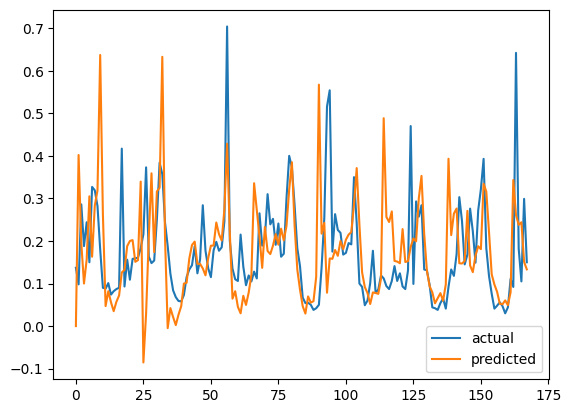

In [27]:
##################
### EVALUATION ###
##################

test_data = test_data.reset_index(drop=True)

#### !!!! Exclude when DATASET 01 - No exog variables !!!! ####
#exog = test_data.iloc[:, 1:].values.astype(float)
#predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1], exog=exog)
predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])
#### !!!! Exclude when DATASET 01 - No exog variables !!!! ####

consumption = test_data['energy(kWh/hh)']


# Print the elapsed time
print(f"SARIMAX Elapsed time : {elapsed_time} seconds.")
print("\n\n")

# # PRINT EVALUATIONS
# consumption = test_data['energy(kWh/hh)']
# predictions = pd.Series(predictions, index=consumption.index)
mse = mean_squared_error(consumption, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(consumption, predictions)
mape = mean_absolute_percentage_error(consumption, predictions)
print("Evaluation of SARIMAX\n")
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("MAPE: ", mape)
print("\n\n")


# Reshape predictions and actual values
# Plot predictions and actual values
print("SARIMAX Plots of Test Data - Actual versus Predicted\n")
predictions = np.array(predictions).reshape(-1)
actual_values = consumption.values.reshape(-1)
plt.plot(actual_values, label='actual')
plt.plot(predictions, label='predicted')
plt.legend()
plt.show()